# Exploring Demographic Data and Graduation Rates by High School in Santa Clara County

In [79]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [3]:
scc_hs_data_url = 'https://www.zipdatamaps.com/schools/california/county/map-of-santa-clara-county-ca-high-school-attendance-zones'

response = requests.get(scc_hs_data_url)

if response.status_code == 200:
     soup = BeautifulSoup(response.content, 'html.parser')
     table = soup.find("table")

data_rows = []
for row in table.find_all('tr'):
        # create a row for each <tr> and cell for each <td>
        cells = row.find_all('td')
        row_data = [cell.get_text(strip=True) for cell in row.find_all(['td', 'th'])]
        data_rows.append(row_data)
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

school_data = pd.DataFrame(data_rows)
school_data

Failed to retrieve the webpage. Status code: 200


,0,1,2,3,4,5,6
0,List of High Schools in Santa Clara County Cal...,None,None,None,None,None,None
1,Map Key,School Name,School District,City,Total Students,None,None
2,,,,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703
3,,,None,None,None,None,None
4,,,,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981
...,...,...,...,...,...,...,...
73,,,None,None,None,None,None
74,,,,Willow Glen High School,San Jose Unified School District,San Jose,1697
75,,,None,None,None,None,None
76,,,,Yerba Buena High School,East Side Union High School District,San Jose,1722


## Data Cleaning 

* This data needs to undergo some modifications so that the rows have the same granularity and represent a public high school in Santa Clara County. The following modifications need to be made:
    * Drop row 1 (This row represents that title) and create a title for the DataFrame object
    * Drop the map key, since the map data will not be used for this project
    * Shift the columns to the left to remove the empty cells.

In [4]:
school_data.name = school_data.iloc[0, 0]
print(school_data.name)
school_data = school_data.drop(school_data.columns[0], axis=1)
school_data.columns = school_data.iloc[1]
school_data = school_data.drop([0, 1], axis=0)
school_data

List of High Schools in Santa Clara County California


1,School Name,School District,City,Total Students,NaN,NaN
2,,,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703
3,,None,None,None,None,None
4,,,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981
5,,None,None,None,None,None
6,,,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476
...,...,...,...,...,...,...
73,,None,None,None,None,None
74,,,Willow Glen High School,San Jose Unified School District,San Jose,1697
75,,None,None,None,None,None
76,,,Yerba Buena High School,East Side Union High School District,San Jose,1722


In [5]:
# drop odd rows starting at 3 and last column

n = 3
while n <= 77:
    school_data = school_data.drop(n)
    n += 2

school_data

1,School Name,School District,City,Total Students,NaN,NaN
2,,,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703
4,,,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981
6,,,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476
8,,,Branham High School,Campbell Union High School District,San Jose,1911
10,,,Christopher High School,Gilroy Unified School District,Gilroy,1707
12,,,Cupertino High School,Fremont Union High School District,Cupertino,2198
14,,,Del Mar High School,Campbell Union High School District,San Jose,1326
16,,,Evergreen Valley High School,East Side Union High School District,San Jose,2999
18,,,Fremont High School,Fremont Union High School District,Sunnyvale,2236
20,,,Gilroy High School,Gilroy Unified School District,Gilroy,1770


In [6]:
# shift rows to the left
rows_to_shift = school_data.index[1:]
school_data = school_data.apply(lambda row: row.shift(-2), axis=1)
school_data

1,School Name,School District,City,Total Students,NaN,NaN
2,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703,NaN,NaN
4,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981,NaN,NaN
6,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476,NaN,NaN
8,Branham High School,Campbell Union High School District,San Jose,1911,NaN,NaN
10,Christopher High School,Gilroy Unified School District,Gilroy,1707,NaN,NaN
12,Cupertino High School,Fremont Union High School District,Cupertino,2198,NaN,NaN
14,Del Mar High School,Campbell Union High School District,San Jose,1326,NaN,NaN
16,Evergreen Valley High School,East Side Union High School District,San Jose,2999,NaN,NaN
18,Fremont High School,Fremont Union High School District,Sunnyvale,2236,NaN,NaN
20,Gilroy High School,Gilroy Unified School District,Gilroy,1770,NaN,NaN


In [7]:
# drop the last 2 columns
school_data = school_data.iloc[:, :4]
school_data

1,School Name,School District,City,Total Students
2,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703
4,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981
6,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476
8,Branham High School,Campbell Union High School District,San Jose,1911
10,Christopher High School,Gilroy Unified School District,Gilroy,1707
12,Cupertino High School,Fremont Union High School District,Cupertino,2198
14,Del Mar High School,Campbell Union High School District,San Jose,1326
16,Evergreen Valley High School,East Side Union High School District,San Jose,2999
18,Fremont High School,Fremont Union High School District,Sunnyvale,2236
20,Gilroy High School,Gilroy Unified School District,Gilroy,1770


In [8]:
school_data = school_data.reset_index().drop('index', axis=1)
school_data

1,School Name,School District,City,Total Students
0,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703
1,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981
2,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476
3,Branham High School,Campbell Union High School District,San Jose,1911
4,Christopher High School,Gilroy Unified School District,Gilroy,1707
5,Cupertino High School,Fremont Union High School District,Cupertino,2198
6,Del Mar High School,Campbell Union High School District,San Jose,1326
7,Evergreen Valley High School,East Side Union High School District,San Jose,2999
8,Fremont High School,Fremont Union High School District,Sunnyvale,2236
9,Gilroy High School,Gilroy Unified School District,Gilroy,1770


In [9]:
school_data['first word'] = school_data['School Name'].str.split().str[0]

## School Demographic Data

* This data includes demographic information for all high schools in California.
* This data will be used to isolate demographic information for the public high schools in Santa Clara County.
* Data obtained from: https://gis.data.ca.gov/datasets/CDEGIS::california-schools-2022-23/explore?filters=eyJDb3VudHlOYW1lIjpbIlNhbnRhIENsYXJhIl0sIlNjaG9vbFR5cGUiOlsiSGlnaCJdfQ%3D%3D&location=37.356322%2C-122.020112%2C10.90&showTable=true and based on the 2022-23 Academic year.

In [118]:
school_info = pd.read_csv('high_schools_info.csv')

school_info['first word'] = school_info['School Name'].str.split().str[0]
school_info.head()

,OBJECTID,Academic Year,Fed ID,CDS Code,District Code,School Code,Region,County Name,District Name,School Name,...,Migrant (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),Students with Disabilities,Students with Disabilities (%),Free/Reduced Meal Eligible,Free/Reduced Meal Eligible (%),x,y,first word
0,8230,2022-23,60223312016,43104390113431,4310439,113431,5,Santa Clara,Santa Clara County Office of Education,University Preparatory Academy Charter,...,0.0,218,30.6,18,2.5,214,30.0,-1.356694e+07,4.479752e+06,University
1,8238,2022-23,60222212625,43104390123794,4310439,123794,5,Santa Clara,Santa Clara County Office of Education,Summit Public School: Tahoma,...,0.6,79,25.2,58,18.5,73,23.2,-1.356094e+07,4.474557e+06,Summit
2,8249,2022-23,69103514054,43104390135087,4310439,135087,5,Santa Clara,Santa Clara County Office of Education,Opportunity Youth Academy,...,0.3,298,88.4,79,23.4,287,85.2,-1.356987e+07,4.492728e+06,Opportunity
3,8309,2022-23,60723008122,43694014330239,4369401,4330239,5,Santa Clara,Campbell Union High,Leigh High,...,0.0,381,21.0,179,9.9,324,17.9,-1.357212e+07,4.472916e+06,Leigh
4,8311,2022-23,60723008350,43694014330866,4369401,4330866,5,Santa Clara,Campbell Union High,Branham High,...,0.0,663,33.3,241,12.1,589,29.6,-1.356976e+07,4.474545e+06,Branham


In [119]:
school_merged = school_data.merge(school_info, on="first word")
school_merged = school_merged.drop('first word', axis=1)
school_merged.head()

,School Name_x,School District,City_x,Total Students,OBJECTID,Academic Year,Fed ID,CDS Code,District Code,School Code,...,Migrant,Migrant (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),Students with Disabilities,Students with Disabilities (%),Free/Reduced Meal Eligible,Free/Reduced Meal Eligible (%),x,y
0,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703,8527,2022-23,63459005696,43696664333795,4369666,4333795,...,0,0.0,1005,59.4,166,9.8,907,53.6,-1.357254e+07,4.484949e+06
1,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981,8573,2022-23,63543006055,43696744338802,4369674,4338802,...,4,0.2,835,44.9,259,13.9,739,39.8,-1.357951e+07,4.490249e+06
2,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476,8448,2022-23,62583011453,43695830102368,4369583,102368,...,17,1.1,443,29.1,159,10.5,416,27.4,-1.354417e+07,4.461488e+06
3,Branham High School,Campbell Union High School District,San Jose,1911,8311,2022-23,60723008350,43694014330866,4369401,4330866,...,0,0.0,663,33.3,241,12.1,589,29.6,-1.356976e+07,4.474545e+06
4,Christopher High School,Gilroy Unified School District,Gilroy,1707,8408,2022-23,61518012264,43694840118380,4369484,118380,...,2,0.1,661,39.7,210,12.6,580,34.9,-1.353662e+07,4.444210e+06


### More Data Cleaning 
* Drop Unnecessary Columns
* Refactor Columns

In [120]:
# drop unneccesary columns
school_merged = school_merged.drop(columns=["OBJECTID", "Fed ID", "CDS Code", "District Code", \
                                            "School Code", "School Level", "School Type", "School Name_y", \
                                            "City_y", "Grade Low", "Grade High", "Status", "Closed Date", \
                                            "Academic Year", "Charter Num", "Region"])
school_merged.head()

,School Name_x,School District,City_x,Total Students,County Name,District Name,Open Date,Charter,Funding Type,Virtual,...,Migrant,Migrant (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),Students with Disabilities,Students with Disabilities (%),Free/Reduced Meal Eligible,Free/Reduced Meal Eligible (%),x,y
0,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703,Santa Clara,San Jose Unified,7/1/1980 12:00:00 AM,N,NaN,C,...,0,0.0,1005,59.4,166,9.8,907,53.6,-1.357254e+07,4.484949e+06
1,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981,Santa Clara,Santa Clara Unified,7/1/1980 12:00:00 AM,N,NaN,N,...,4,0.2,835,44.9,259,13.9,739,39.8,-1.357951e+07,4.490249e+06
2,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476,Santa Clara,Morgan Hill Unified,8/26/2004 12:00:00 AM,N,NaN,C,...,17,1.1,443,29.1,159,10.5,416,27.4,-1.354417e+07,4.461488e+06
3,Branham High School,Campbell Union High School District,San Jose,1911,Santa Clara,Campbell Union High,8/16/1999 12:00:00 AM,N,NaN,N,...,0,0.0,663,33.3,241,12.1,589,29.6,-1.356976e+07,4.474545e+06
4,Christopher High School,Gilroy Unified School District,Gilroy,1707,Santa Clara,Gilroy Unified,8/20/2009 12:00:00 AM,N,NaN,N,...,2,0.1,661,39.7,210,12.6,580,34.9,-1.353662e+07,4.444210e+06


<AxesSubplot:xlabel='Hispanic (%)', ylabel='Socioeconomically Disadvantaged (%)'>

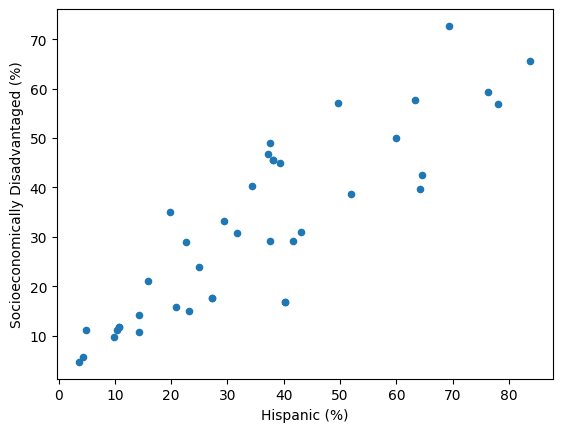

In [12]:
school_merged.plot.scatter(x='Hispanic (%)', y='Socioeconomically Disadvantaged (%)') 

In [13]:
print(school_merged['Hispanic (%)'].corr(school_merged['Socioeconomically Disadvantaged (%)']))
print(school_merged['Asian (%)'].corr(school_merged['Socioeconomically Disadvantaged (%)']))
print(school_merged['Migrant (%)'].corr(school_merged['Socioeconomically Disadvantaged (%)']))
print(school_merged['White (%)'].corr(school_merged['Socioeconomically Disadvantaged (%)']))

0.8700772421834556
-0.5981628936488906
0.3369443023142924
-0.36652287376299775


In [14]:
school_merged['School District'].unique()

array(['San Jose Unified School District',
       'Santa Clara Unified School District',
       'Morgan Hill Unified School District',
       'Campbell Union High School District',
       'Gilroy Unified School District',
       'Fremont Union High School District',
       'East Side Union High School District',
       'Mountain View-Los Altos Union School District',
       'Los Gatos-Saratoga Joint Union School District',
       'Milpitas Unified School District',
       'Palo Alto Unified School District'], dtype=object)

## Adding Graduation Rates

* Data Source: https://www.usnews.com/education/best-high-schools/california/rankings
    * US News Report
* Scraping method: Selenium Chrome Driver to extract graduation rates 

In [16]:
driver = webdriver.Chrome()

In [82]:
driver.get("https://www.usnews.com/education/best-high-schools/california/rankings")

In [83]:
#for option in dropdown.options:
#    print(option.text)

scc_district_names = school_merged['School District'].unique().tolist()

# four district names were not found on the dropdown object and required edits
scc_district_names.remove('Campbell Union High School District')
scc_district_names.remove('Fremont Union High School District')
scc_district_names.remove('Mountain View-Los Altos Union School District')
scc_district_names.remove('Los Gatos-Saratoga Joint Union School District')
scc_district_names = scc_district_names + ['Campbell Union High', 'Fremont Union High', 'Mountain View-Los Altos Union High', 'Los Gatos-Saratoga Joint Union High']

grad_rates = {}
dt_text = "Graduation Rate"
# search by district contained in the 'District Name' column
dropdown = Select(driver.find_element(By.NAME, 'district-id'))

for name in scc_district_names:
    dropdown.select_by_visible_text(name)
    time.sleep(2)
    # elements = driver.find_elements(By.XPATH, "//div[contains(@class, 'DetailCardHighSchools')]")
    school_name_elements = WebDriverWait(driver, 20).until(EC.visibility_of_all_elements_located((By.XPATH, "//a[contains(@class, 'DetailCardHighSchools__AnchorStyled')]")))
    grad_rate_elements = WebDriverWait(driver, 20).until(EC.visibility_of_all_elements_located((By.XPATH, f"//dt[text()='{dt_text}']/following-sibling::dd")))
    time.sleep(10)
    for name_elem, rate_elem in zip(school_name_elements, grad_rate_elements):
        name = name_elem.text
        rate = rate_elem.text
        grad_rates[name] = rate
        print(name, rate)
    
print(grad_rates)
    

Leland High School 98%
Pioneer High School 98%
Willow Glen High School 96%
Abraham Lincoln High School 95%
San Jose High School 92%
Gunderson High School 93%
Middle College High School 93%
Broadway High School 57%
Liberty High (Alternative) 68%
Adrian Wilcox High School 95%
Santa Clara High School 95%
Mission Early College High School 98%
New Valley Continuation High School 88%
Santa Clara Community Day N/A
Wilson Alternative 38%
Ann Sobrato High School 96%
Live Oak High School 91%
Central High (Continuation) 54%
Dr. T.J. Owens Gilroy Early College Academy 97%
Christopher High School 93%
Gilroy High School 87%
Mt. Madonna High School 41%
Evergreen Valley High School 94%
Piedmont Hills High School 93%
Silver Creek High School 92%
Santa Teresa High School 88%
Independence High School 87%
James Lick High School 82%
Yerba Buena High School 85%
Mount Pleasant High School 78%
Oak Grove High School 85%
William C. Overfelt High School 75%
Andrew P. Hill High School 78%
Apollo High School 84%
F

In [86]:
keys = grad_rates.keys()
vals = grad_rates.values()

grad_rates_df = pd.DataFrame({"School Name": keys, "Graduation Rate": vals})
grad_rates_df

,School Name,Graduation Rate
0,Leland High School,98%
1,Pioneer High School,98%
2,Willow Glen High School,96%
3,Abraham Lincoln High School,95%
4,San Jose High School,92%
...,...,...
56,Los Altos High School,98%
57,Mountain View High School,91%
58,Alta Vista High School,34%
59,Saratoga High School,97%


### Merging Graduation Data with Demographic Data

In [121]:
school_merged = school_merged.rename(columns = {'School Name_x': 'School Name', 'City_x': 'City'})
scc_school_data = school_merged.merge(grad_rates_df)
scc_school_data.head()

,School Name,School District,City,Total Students,County Name,District Name,Open Date,Charter,Funding Type,Virtual,...,Migrant (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),Students with Disabilities,Students with Disabilities (%),Free/Reduced Meal Eligible,Free/Reduced Meal Eligible (%),x,y,Graduation Rate
0,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703,Santa Clara,San Jose Unified,7/1/1980 12:00:00 AM,N,NaN,C,...,0.0,1005,59.4,166,9.8,907,53.6,-1.357254e+07,4.484949e+06,95%
1,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981,Santa Clara,Santa Clara Unified,7/1/1980 12:00:00 AM,N,NaN,N,...,0.2,835,44.9,259,13.9,739,39.8,-1.357951e+07,4.490249e+06,95%
2,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476,Santa Clara,Morgan Hill Unified,8/26/2004 12:00:00 AM,N,NaN,C,...,1.1,443,29.1,159,10.5,416,27.4,-1.354417e+07,4.461488e+06,96%
3,Branham High School,Campbell Union High School District,San Jose,1911,Santa Clara,Campbell Union High,8/16/1999 12:00:00 AM,N,NaN,N,...,0.0,663,33.3,241,12.1,589,29.6,-1.356976e+07,4.474545e+06,93%
4,Christopher High School,Gilroy Unified School District,Gilroy,1707,Santa Clara,Gilroy Unified,8/20/2009 12:00:00 AM,N,NaN,N,...,0.1,661,39.7,210,12.6,580,34.9,-1.353662e+07,4.444210e+06,93%


## Exporting the School Data to a CSV

In [124]:
scc_school_data.to_csv("scc_school_data.csv", index=False)